# K-Nearest Neighbour

In [85]:
import pandas as pd

In [86]:
# decision import data
data = pd.read_csv('./dataset/xAPI-Edu-Data.csv')
data.head(20)
# data.info()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [87]:
# convert to numeric
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['gender'] = enc.fit_transform(data['gender'].values)
data['NationalITy'] = enc.fit_transform(data['NationalITy'].values)
data['PlaceofBirth'] = enc.fit_transform(data['PlaceofBirth'].values)
data['StageID'] = enc.fit_transform(data['StageID'].values)
data['GradeID'] = enc.fit_transform(data['GradeID'].values)
data['SectionID'] = enc.fit_transform(data['SectionID'].values)
data['Topic'] = enc.fit_transform(data['Topic'].values)
data['Semester'] = enc.fit_transform(data['Semester'].values)
data['Relation'] = enc.fit_transform(data['Relation'].values)
data['ParentAnsweringSurvey'] = enc.fit_transform(
    data['ParentAnsweringSurvey'].values)
data['ParentschoolSatisfaction'] = enc.fit_transform(
    data['ParentschoolSatisfaction'].values)
data['StudentAbsenceDays'] = enc.fit_transform(
    data['StudentAbsenceDays'].values)

# data.head(20)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int32 
 1   NationalITy               480 non-null    int32 
 2   PlaceofBirth              480 non-null    int32 
 3   StageID                   480 non-null    int32 
 4   GradeID                   480 non-null    int32 
 5   SectionID                 480 non-null    int32 
 6   Topic                     480 non-null    int32 
 7   Semester                  480 non-null    int32 
 8   Relation                  480 non-null    int32 
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    int32 
 14  ParentschoolSatisfaction  

In [88]:
# get columns without class
columns_without_class = data.drop(columns=['Class', 'ParentschoolSatisfaction', 'AnnouncementsView', 'raisedhands', 'Semester', 'Topic', 'ParentAnsweringSurvey', 'VisITedResources', 'PlaceofBirth', "StageID", 'GradeID', 'Relation'])
columns_without_class.head(20)
# columns_without_class.info()

,gender,NationalITy,SectionID,Discussion,StudentAbsenceDays
0,1,4,0,20,1
1,1,4,0,25,1
2,1,4,0,30,0
3,1,4,0,35,0
4,1,4,0,50,0
5,0,4,0,70,0
6,1,4,0,17,0
7,1,4,0,22,1
8,0,4,0,50,1
9,0,4,1,70,1


In [89]:
x = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(columns_without_class, y, test_size = 0.3, random_state=480)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [94]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [95]:
#FIND OPTIMAL N VALUE
error_rate = []
for i in range (1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

print("Minimum error of ", min(error_rate), "using K ", error_rate.index(min(error_rate)) + 1)

optimal_k_val = error_rate.index(min(error_rate)) + 1

Minimum error of  0.3888888888888889 using K  9


In [96]:
knn = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
y_pred = knn.predict(x_test)

In [99]:
cm = confusion_matrix(y_test, y_pred)

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [101]:
#GET ACCCURACY OF CLASSIFICATION ALGORITHM
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           H       0.53      0.75      0.62        36
           L       0.65      0.77      0.71        39
           M       0.66      0.45      0.53        69

    accuracy                           0.61       144
   macro avg       0.61      0.66      0.62       144
weighted avg       0.63      0.61      0.60       144



In [102]:
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.6111111111111112


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import decimal

In [104]:
feature_importance_data = {
    'gender':[0], 
    'NationalITy':[0], 
    # 'PlaceofBirth':[0], 
    # 'StageID':[0], 
    # 'GradeID':[0],
    'SectionID':[0], 
    # 'Topic':[0], 
    # 'Semester':[0], 
    # 'Relation':[0], 
    # 'raisedhands':[0],
    # 'VisITedResources':[0], 
    # 'AnnouncementsView':[0], 
    'Discussion':[0],
    # 'ParentAnsweringSurvey':[0], 
    # 'ParentschoolSatisfaction':[0],
    'StudentAbsenceDays':[0], 
    # 'Class':[0]
}

feat_imp = pd.DataFrame(feature_importance_data)

i = 0
for name, values in feat_imp.iteritems():
    feature_test = x_test.copy()
    feature_test[i] = np.random.permutation(feature_test[i])
    feat_imp[name] = acc_score - knn.score(feature_test, y_test)
    i += 1

print(feat_imp.head())

     gender  NationalITy  SectionID  Discussion  StudentAbsenceDays
0  0.006944     0.006944  -0.006944    0.006944                 0.0


Index(['gender', 'NationalITy', 'SectionID', 'Discussion',
       'StudentAbsenceDays'],
      dtype='object')
[ 0.00694444  0.00694444 -0.00694444  0.00694444  0.        ]
[2 4 0 1 3]
range(0, 5)


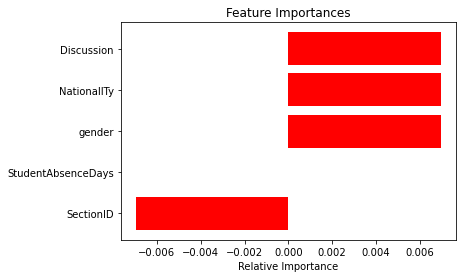

In [105]:
features = columns_without_class.columns
importances = feat_imp.values[0]
indices = np.argsort(importances)

print(features)
print(importances)
print(indices)
print(range(len(indices)))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()